## **Notebook Goal**

This project focuses on the development of a Machine Learning Model for Stroke Prediction, carried out by the Data Analysis department at Hospital F5.

The stroke prediction model is based on the use of 11 information variables extracted from a dataset containing 4,982 records of positive and negative stroke cases. These variables will be used as features to train and evaluate various Machine Learning classification algorithms.

## **Notebook Content**

0. Importing Libraries and Dataset

1. Basic Understanding of Data

2. Exploratory Data Analysis (EDA)

3. Feature Engineering

4. Data Preprocessing

5. Model Building

6. Model Performance Check

7. Model Hyper Parameter Tunning

8. Analysis of the Most Influential Features in the Model

9. Conclusion

## **Importing Libraries and Dataset**

In [ ]:
# Librerías de análisis
import numpy as np
import pandas as pd
import math
from scipy import stats
from tabulate import tabulate

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Librerías de ML

In [ ]:
import pandas as pd
path = "/work/stroke_dataset.csv"
df = pd.read_csv(path)

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## **1. Basic Understanding of Data**

1.1. Data Description

1.2. Unique Values in Each Column

1.3. Data Dimension Check

1.4. Data Type Check

🔹 Categorical

🔹 Numeric

🔹 Mixed Data Types

🔹 Errors or Typos

1.5. Duplicate Data Check

1.6. Total Number and Percentage of Missing Values Check

1.7. Cardinality Check of Categorical Features

### **1.1. Data Description**

In [ ]:
# Feature, data type and non-null count
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


This dataset is a table represented as a Pandas DataFrame, with the following characteristics:

**Number of Entries (Rows):** 4981
**Number of Columns (Attributes):** 11

Here are the descriptions of each of the columns:

**gender:** A categorical variable representing the gender of individuals (e.g., male, female, etc.).

**age:** A numerical variable representing the age of individuals in years (data type: float).

**hypertension:** A binary variable (0 or 1) indicating whether the person has hypertension (0 = No, 1 = Yes).

**heart_disease:** A binary variable (0 or 1) indicating whether the person has heart diseases (0 = No, 1 = Yes).

**ever_married:** A categorical variable indicating whether the person has been married before (e.g., Yes or No).

**work_type:** A categorical variable describing the type of job the person has (e.g., private job, government, etc.).

**Residence_type:** A categorical variable describing the type of residence of the person (e.g., urban or rural).

**avg_glucose_level:** A numerical variable representing the average blood glucose level of individuals (data type: float).

**bmi:** A numerical variable representing the body mass index (BMI) of individuals (data type: float).

**smoking_status:** A categorical variable describing the smoking status of individuals (e.g., smoker, ex-smoker, never smoker, etc.).

**stroke:** A binary variable (0 or 1) indicating whether the person has had a stroke (0 = No, 1 = Yes).

In [ ]:
# Summary statistics for numerical features
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


### **1.2.  Unique Values in Each Column**

In [ ]:
# Obtener los valores únicos de las columnas que los pueden tener
cols_con_unicos = [
    'gender',
    'hypertension',
    'ever_married',
    'work_type',
    'Residence_type',
    'smoking_status',
    'stroke'
]

vals_unicos = {}
for col in cols_con_unicos:
    valores = df[col].unique()
    vals_unicos[col] = valores

# Convertir el diccionario en una lista de listas para tabulate
tabla_datos = []
for col, valores in vals_unicos.items():
    tabla_datos.append([col, ', '.join(map(str, valores))])

# Imprimir la tabla
print(tabulate(tabla_datos, headers=["Columna", "Valores Únicos"], tablefmt="grid"))

+----------------+------------------------------------------------+
| Columna        | Valores Únicos                                 |
+================+================================================+
| gender         | Male, Female                                   |
+----------------+------------------------------------------------+
| hypertension   | 0, 1                                           |
+----------------+------------------------------------------------+
| ever_married   | Yes, No                                        |
+----------------+------------------------------------------------+
| work_type      | Private, Self-employed, Govt_job, children     |
+----------------+------------------------------------------------+
| Residence_type | Urban, Rural                                   |
+----------------+------------------------------------------------+
| smoking_status | formerly smoked, never smoked, smokes, Unknown |
+----------------+------------------------------

### **1.3. Data Dimension Check**

In [ ]:
# Number of rows and columns in dataset
df.shape

(4981, 11)

### **1.4. Data Type Check**

In [ ]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
data_types = df.dtypes
categorical_columns = data_types[data_types == 'object'].index.tolist()
numeric_columns = data_types[data_types != 'object'].index.tolist()

print("1. Columnas Categóricas:", ", ".join(categorical_columns))
print()
print("2. Columnas Numéricas:", ", ".join(numeric_columns))

1. Columnas Categóricas: gender, ever_married, work_type, Residence_type, smoking_status

2. Columnas Numéricas: age, hypertension, heart_disease, avg_glucose_level, bmi, stroke


##### **Categorical**

In [ ]:
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()

In [ ]:
for i in categorical_columns:
    print(f"La columna: {i}")
    print(df[i].value_counts())

La columna: gender
Female    2907
Male      2074
Name: gender, dtype: int64
La columna: ever_married
Yes    3280
No     1701
Name: ever_married, dtype: int64
La columna: work_type
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64
La columna: Residence_type
Urban    2532
Rural    2449
Name: Residence_type, dtype: int64
La columna: smoking_status
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64


**Numeric**

In [ ]:
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

### **1.5. Duplicate Data Check**

In [ ]:
df.duplicated().sum()

0

### **1.6. Missing Values Check**

In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### **1.7. Cardinality Check**

**Cardinality of Numeric Columns**

In [ ]:
print("La cardinalidad de las columnas es:")
print()
print(df.select_dtypes(include=["int", "float64"]).nunique())

La cardinalidad de las columnas es:

age                   104
hypertension            2
heart_disease           2
avg_glucose_level    3895
bmi                   342
stroke                  2
dtype: int64


La columna 'age' tiene 104 valores distintos, lo cual es extraño. Vamos a ver cuales son el valor máximo y mínimo.

In [ ]:
max_age = df['age'].max()
min_age = df['age'].min()

print("El valor máximo de la columna 'age' es:", max_age)
print("El valor mínimo de la columna 'age' es:", min_age)

El valor máximo de la columna 'age' es: 82.0
El valor mínimo de la columna 'age' es: 0.08


Vemos que la edad oscila entre 0 y 82 años, pero al ser float64 hay valores intermedios. Sería bueno redondearla al hacer la ingeniería de características.

Se podría valorar el rellenar los datos 'Unknown' de la columna fumadores de todos los niños con 'never smoked'.

Hay muchos menores de 2 años

In [ ]:
(df[df['age']<2]).age.value_counts()

1.80    9
1.32    8
1.64    8
1.08    7
1.88    7
1.24    7
1.72    6
1.48    6
0.24    5
0.32    5
0.56    5
0.88    5
0.72    5
1.00    5
0.80    4
1.56    4
0.64    4
0.48    3
1.16    3
1.40    3
0.40    2
0.08    2
0.16    1
Name: age, dtype: int64

**Cardinality of Categorical Columns**

In [ ]:
print("La cardinalidad de las columnas categóricas es:")
print()
print(df.select_dtypes(include="object").nunique())

La cardinalidad de las columnas categóricas es:

gender            2
ever_married      2
work_type         4
Residence_type    2
smoking_status    4
dtype: int64


## **2. Exploratory Data Analysis (EDA)**


### **2.1. Analysis of the Target Variable 'stroke'**

Text(0.5, 1.0, "Distribución de 'stroke'")

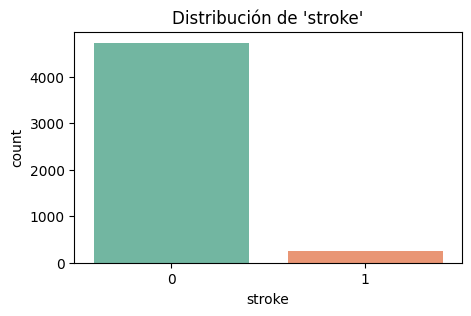

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, x="stroke", palette="Set2")
plt.title("Distribución de 'stroke'")

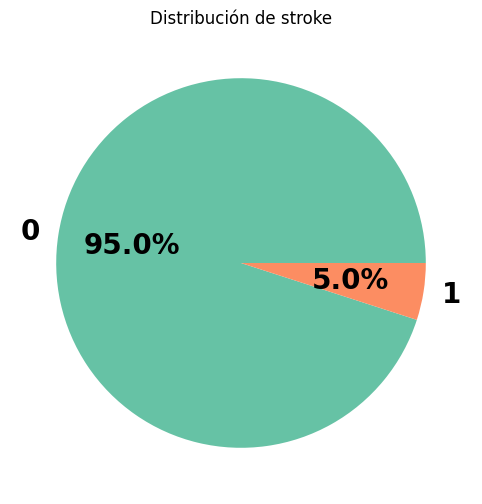

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(df["stroke"].value_counts(),labels=df["stroke"].value_counts().keys(),autopct="%1.1f%%",
       textprops={"fontsize":20,"fontweight":"black"},colors=sns.color_palette("Set2"))
plt.title("Distribución de stroke")
plt.show()

Observamos que la distribución de la variable objetivo está muy desbalanceada y tendremos que utilizar técnicas de balanceo más adelante.

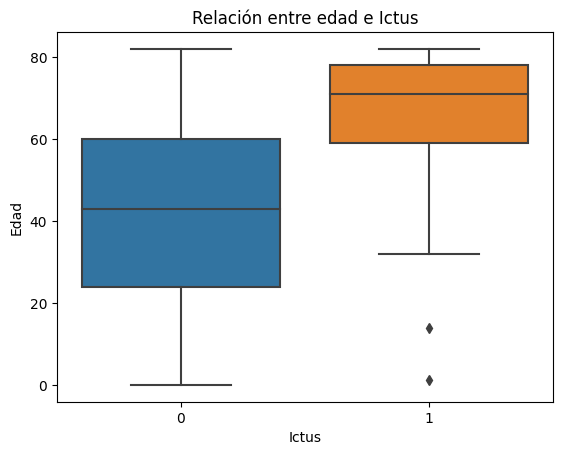

In [ ]:
sns.boxplot(x='stroke', y='age', data=df)
plt.xlabel('Ictus')
plt.ylabel('Edad')
plt.title('Relación entre edad e Ictus')
plt.show()

Se puede observar que la tendencia a sufrir ictus se encuentra entre personas de edad más avanzada. Observamos también, outliers que manejaremos más adelante. 

In [ ]:
df[(df["age"]<15) & (df["stroke"]==1) ]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
205,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
4807,Female,1.32,0,0,No,children,Urban,70.37,18.7,Unknown,1


Hay 2 niños menores de 15 añs que sufrieron un ictus. Además, en ambos la columna 'smokin_status' dice unknown. 

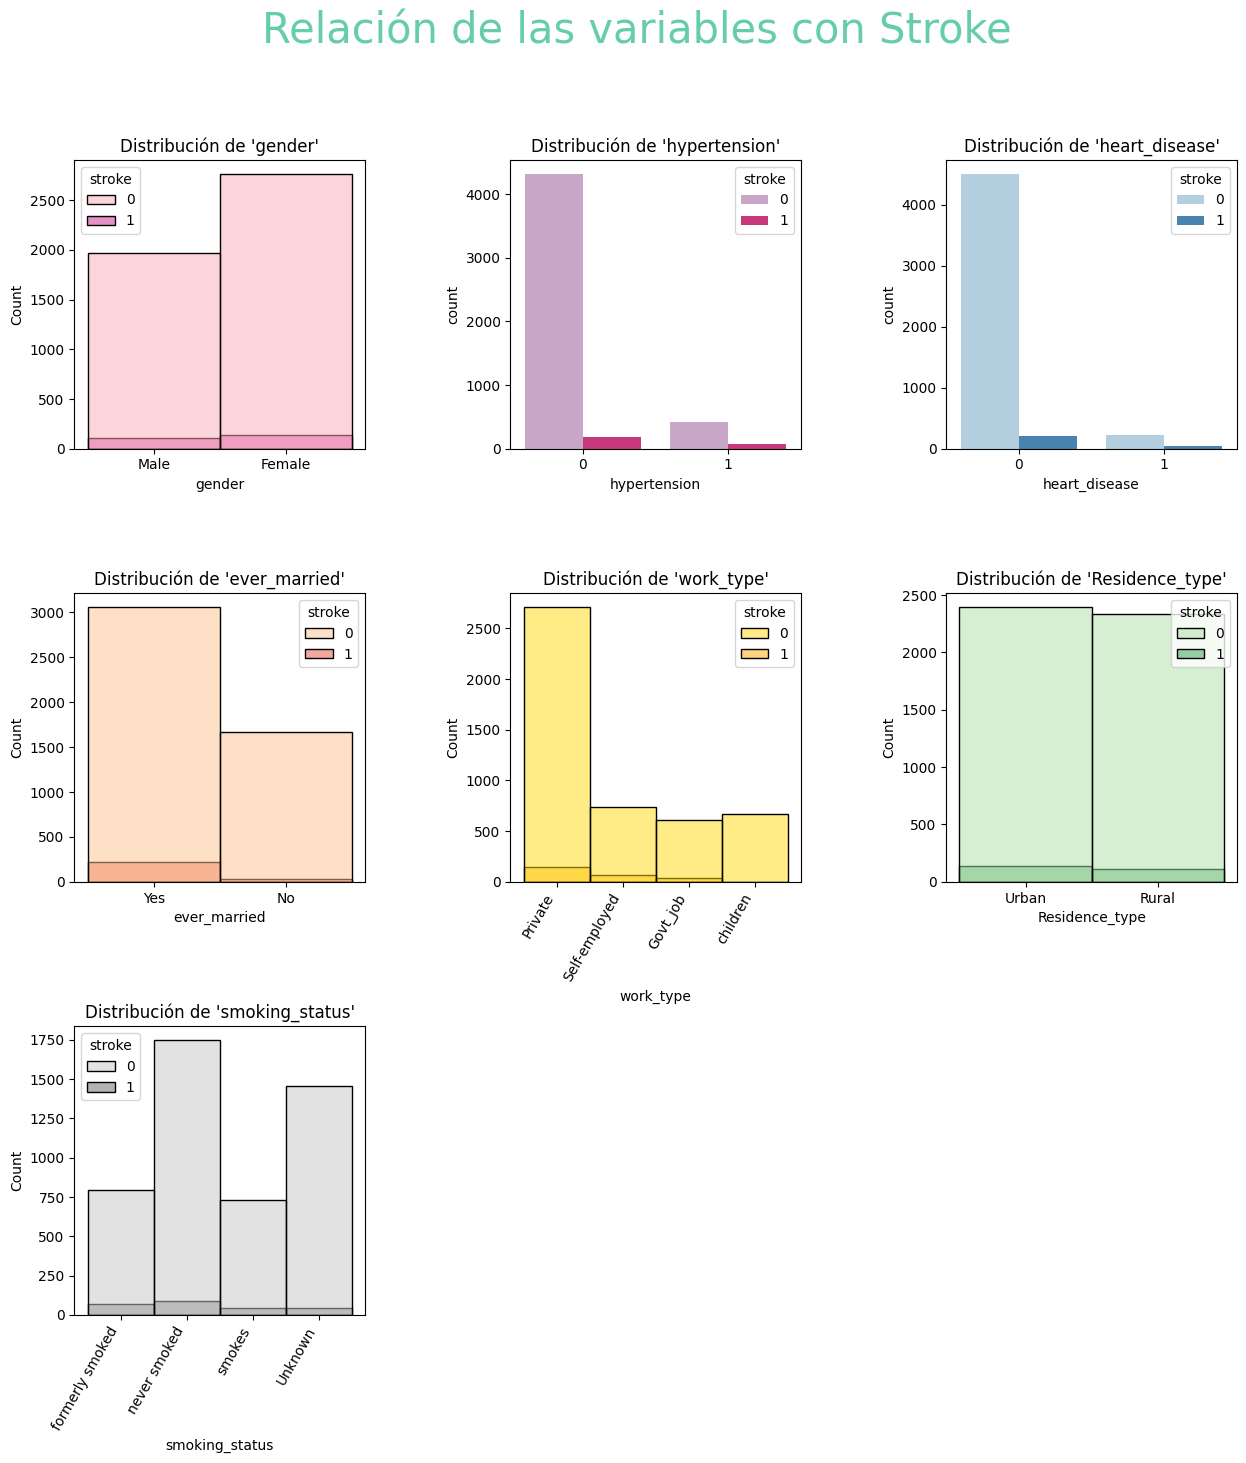

In [ ]:
plt.figure(2, figsize=(15, 15))

plt.suptitle('Relación de las variables con Stroke', fontsize = 30, color = 'mediumaquamarine')

plt.subplot(331)
sns.histplot(data=df, x="gender",  hue='stroke', palette="RdPu")
plt.title("Distribución de 'gender'" )


plt.subplot(332)
sns.countplot(data=df, x="hypertension",  hue='stroke', palette="PuRd")
plt.title("Distribución de 'hypertension'")



plt.subplot(333)
sns.countplot(data=df, x="heart_disease",  hue='stroke', palette="Blues")
plt.title("Distribución de 'heart_disease'")



plt.subplot(334)
sns.histplot(data=df, x="ever_married",  hue='stroke', palette="OrRd")
plt.title("Distribución de 'ever_married'")



plt.subplot(335)
sns.histplot(data=df, x="work_type",  hue='stroke', palette="Wistia")
plt.title("Distribución de 'work_type'")
plt.xticks(rotation=60, ha='right')



plt.subplot(336)
sns.histplot(data=df, x="Residence_type",  hue='stroke', palette="Greens")
plt.title("Distribución de 'Residence_type'")



plt.subplot(337)
sns.histplot(data=df, x="smoking_status",  hue='stroke', palette="Greys")
plt.title("Distribución de 'smoking_status'")
plt.xticks(rotation=60, ha='right')


plt.subplots_adjust(wspace=0.5, hspace=0.5)


plt.show()

Podemos sacar las siguiente conclusiones:

- Nos encontramos que hay más mujeres que hombres, sin embargo, no hay gran diferencia entre quienes sufren ictus.
- Laas variables de hipertensión y ataque al corazón están desbalanceadas y más adelante comprobaremos si hay que balancearlas.
- Podemos observar que hay mayor predisposición de sufrir un ictus si estás casado/a.
- Se observa que al no estar las variables igualmente distribuidas, los resultados no están tan claros y pueden inducir a error, así que vamos a analizar el porcentaje de ictus en cada variable.

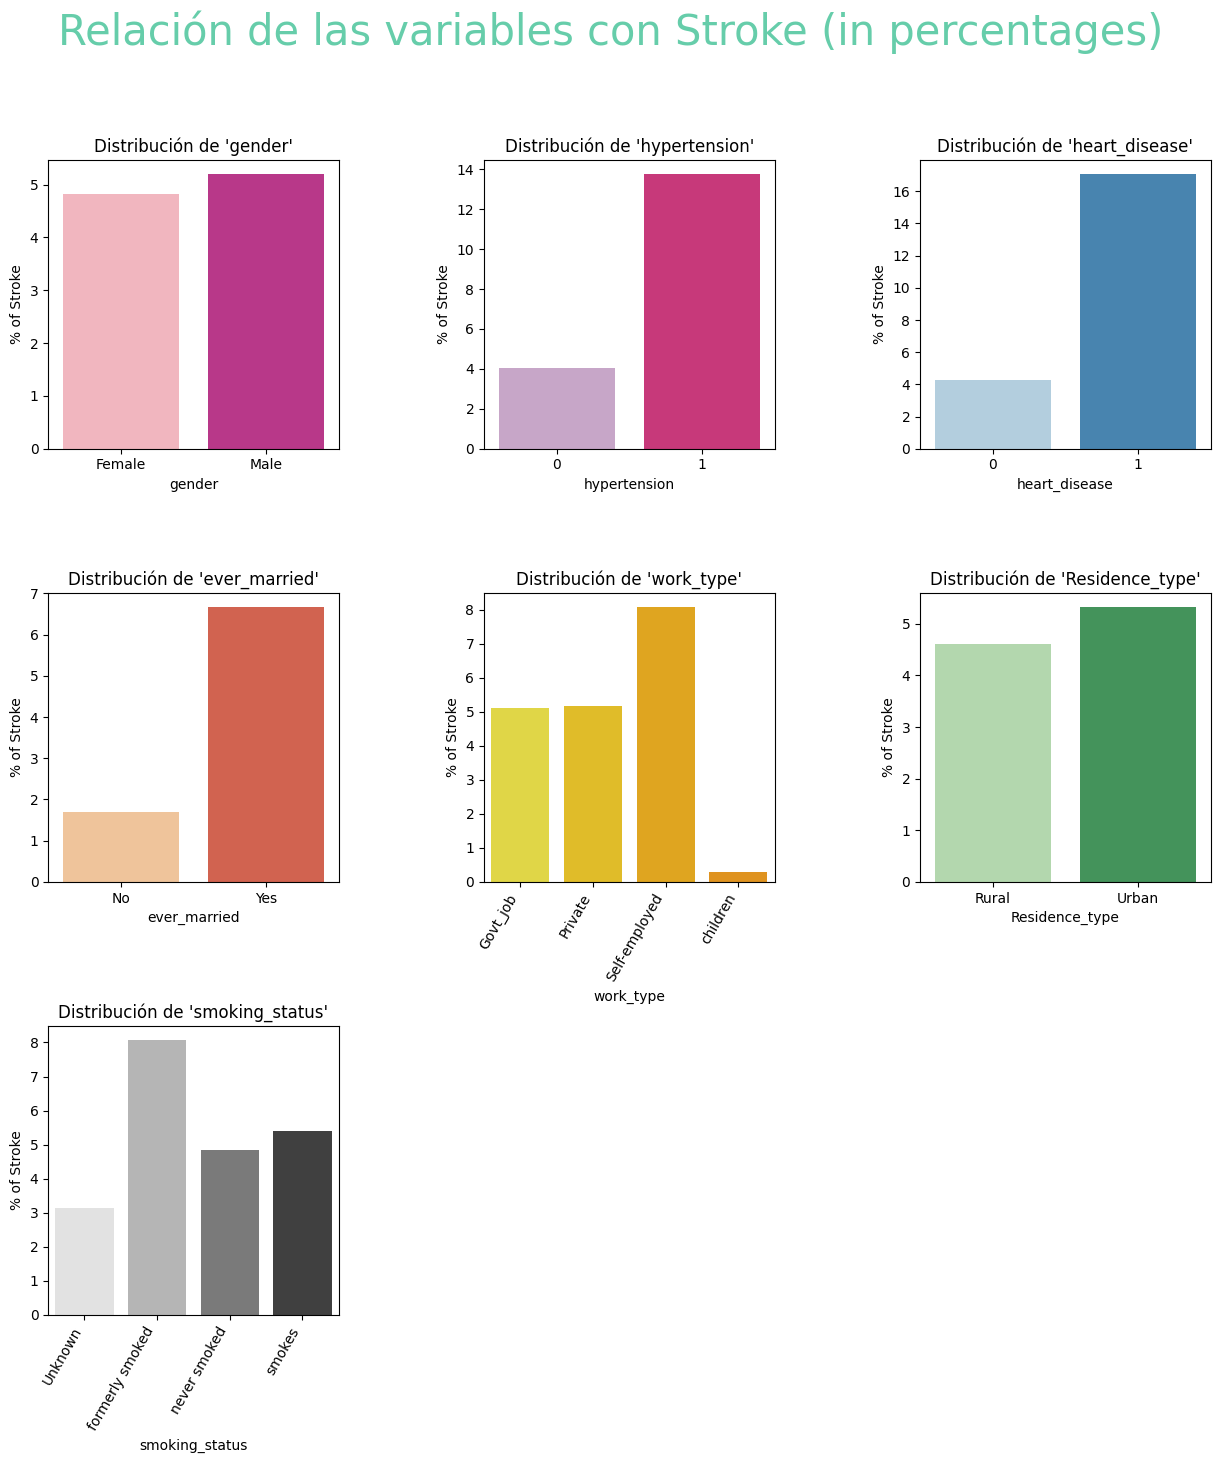

In [ ]:
# Define a function to compute percentages for each category relative to its total
def compute_relative_percentages(column_name):
    category_counts = df.groupby(column_name).size()
    stroke_counts = df[df['stroke'] == 1].groupby(column_name).size()
    percentages = (stroke_counts / category_counts) * 100
    return percentages.reset_index(name='% of Stroke')

# Compute the percentages for the variables
gender_percentages = compute_relative_percentages('gender')
hypertension_percentages = compute_relative_percentages('hypertension')
heart_disease_percentages = compute_relative_percentages('heart_disease')
ever_married_percentages = compute_relative_percentages('ever_married')
work_type_percentages = compute_relative_percentages('work_type')
Residence_type_percentages = compute_relative_percentages('Residence_type')
smoking_status_percentages = compute_relative_percentages('smoking_status')

plt.figure(2, figsize=(15, 15))
plt.suptitle('Relación de las variables con Stroke (in percentages)', fontsize = 30, color = 'mediumaquamarine')

# Plot for 'gender'
plt.subplot(331)
sns.barplot(data=gender_percentages, x="gender", y='% of Stroke', palette="RdPu")
plt.title("Distribución de 'gender'")

# Plot for 'hypertension'
plt.subplot(332)
sns.barplot(data=hypertension_percentages, x="hypertension", y='% of Stroke', palette="PuRd")
plt.title("Distribución de 'hypertension'")

# Plot for 'heart_disease'
plt.subplot(333)
sns.barplot(data=heart_disease_percentages, x="heart_disease", y='% of Stroke', palette="Blues")
plt.title("Distribución de 'heart_disease'")

# Plot for 'ever_married'
plt.subplot(334)
sns.barplot(data=ever_married_percentages, x="ever_married", y='% of Stroke', palette="OrRd")
plt.title("Distribución de 'ever_married'")

# Plot for 'work_type'
plt.subplot(335)
sns.barplot(data=work_type_percentages, x="work_type", y='% of Stroke', palette="Wistia")
plt.title("Distribución de 'work_type'")
plt.xticks(rotation=60, ha='right')

# Plot for 'Residence_type'
plt.subplot(336)
sns.barplot(data=Residence_type_percentages, x="Residence_type", y='% of Stroke', palette="Greens")
plt.title("Distribución de 'Residence_type'")

# Plot for 'smoking_status'
plt.subplot(337)
sns.barplot(data=smoking_status_percentages, x="smoking_status", y='% of Stroke', palette="Greys")
plt.title("Distribución de 'smoking_status'")
plt.xticks(rotation=60, ha='right')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

### Resumen de los hallazgos:

1. **Género**: Los hombres tienen un porcentaje ligeramente mayor de sufrir un derrame que las mujeres.
2. **Hipertensión**: Las personas con hipertensión tienen una mayor probabilidad de sufrir un derrame.
3. **Enfermedad cardíaca**: Aquellos con enfermedad cardíaca muestran una probabilidad significativamente mayor de derrame.
4. **Casados**: Las personas que han estado casadas alguna vez tienen una mayor incidencia de derrame.
5. **Tipo de trabajo**: Los autónomos y aquellos en el sector privado presentan un mayor porcentaje de derrames.
6. **Tipo de residencia**: La diferencia entre residentes urbanos y rurales es mínima.
7. **Estado de fumador**: Exfumadores y fumadores actuales muestran porcentajes similares y más altos de derrames en comparación con los que nunca han fumado.


Text(0.5, 1.0, "Distribución de 'age'")

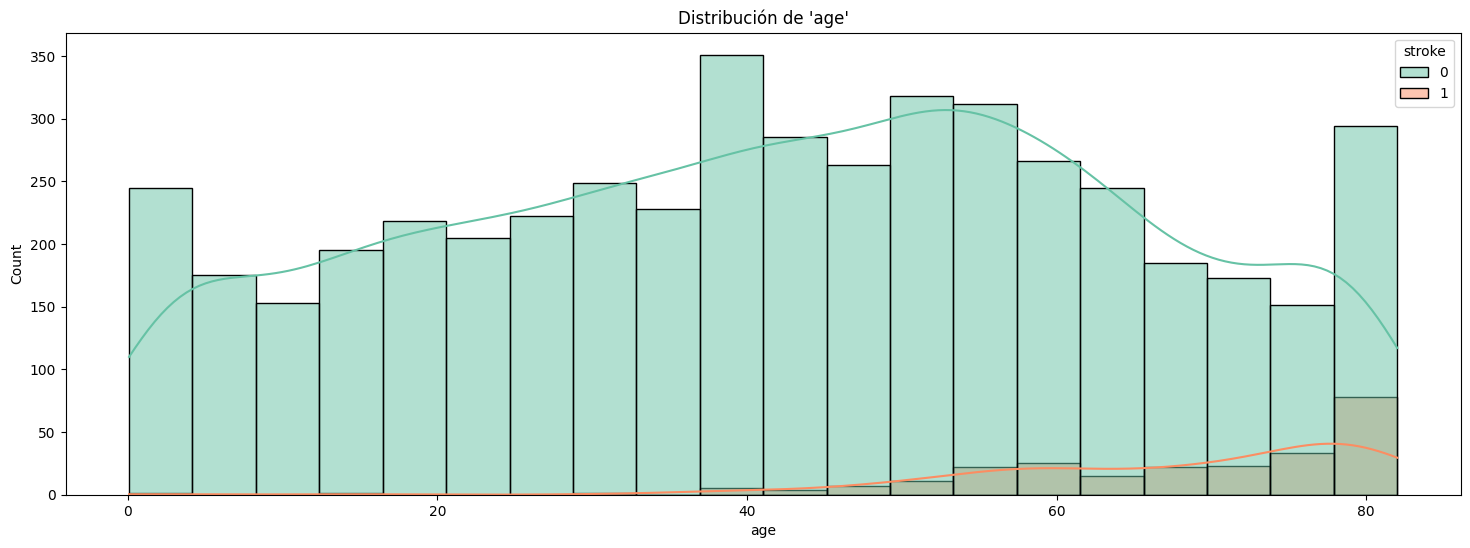

In [ ]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="age",  hue='stroke', palette="Set2", kde=True)
plt.title("Distribución de 'age'")

Podemos observar que al aumentar la edad, aumentan también los casos de ictus. 

Text(0.5, 1.0, "Distribución de 'avg_glucose_level'")

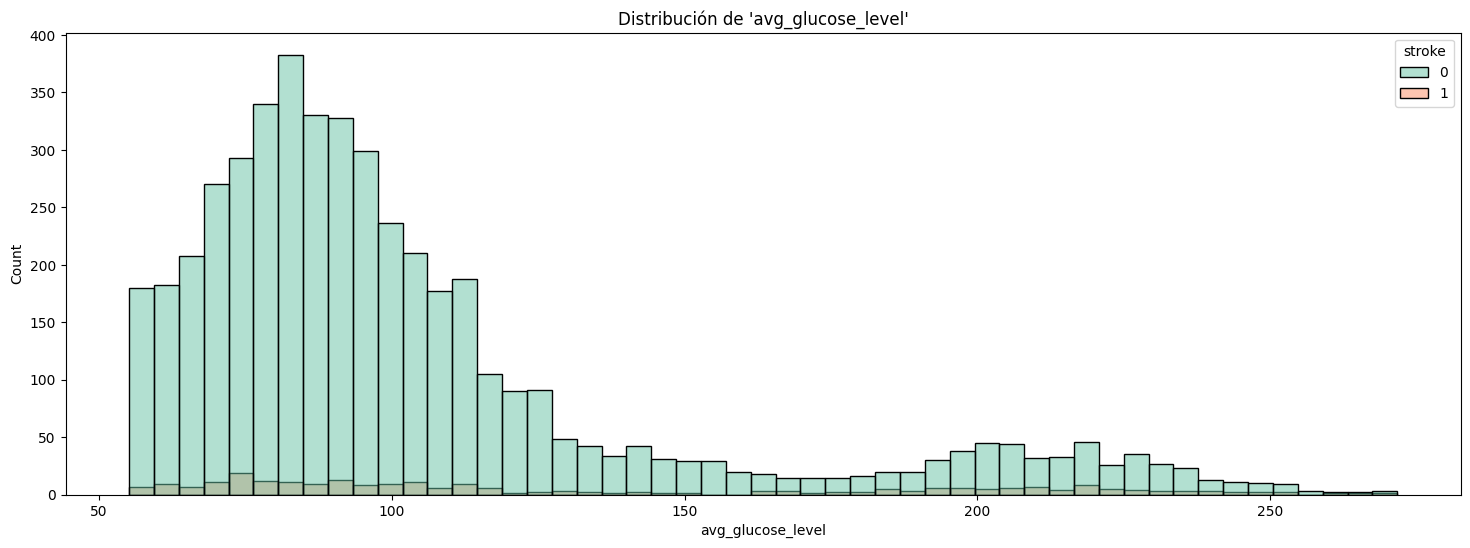

In [ ]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="avg_glucose_level",  hue='stroke', palette="Set2")
plt.title("Distribución de 'avg_glucose_level'")

Los valores óptimos de glucosa es entre 70 y 100. La mayoría de la población estudiada está entre esos valores. Tamién se puede observar que en índices de glucosa altos hay una mayor incidencia de ictus.Sería interesante compararlo con la variable bmi.

Text(0.5, 1.0, "Distribución de 'bmi'")

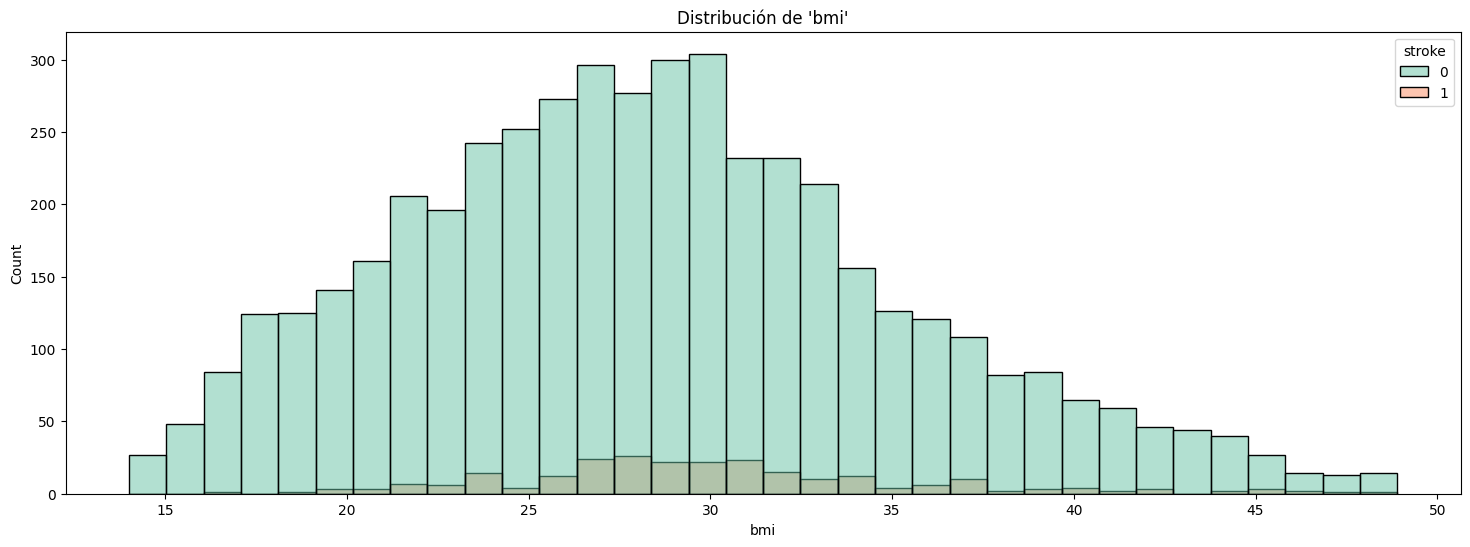

In [ ]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="bmi",  hue='stroke', palette="Set2")
plt.title("Distribución de 'bmi'")

Podemos observar que un bmi alto tiene más posibilidad de sufrir un ictus.

### Análisis de la distribución de BMI con respecto a la ocurrencia de derrames cerebrales:

1. **Distribución General**: La distribución del BMI parece ser aproximadamente normal, con un pico alrededor de 25-30.
2. **Bajo Peso y Derrame Cerebral**: Hay un pequeño número de individuos con bajo peso (BMI < 18.5) que han sufrido un derrame cerebral. Sin embargo, la mayoría en este rango de BMI no ha experimentado un derrame.
3. **Peso Normal y Derrame Cerebral**: En el rango de peso normal (BMI de 18.5 a 24.9), hay una proporción visible de individuos que han sufrido un derrame cerebral, pero sigue siendo una minoría en comparación con aquellos que no lo han hecho.
4. **Sobrepeso y Derrame Cerebral**: En el rango de sobrepeso (BMI de 25 a 29.9), la cantidad de individuos que han experimentado un derrame cerebral parece aumentar, aunque la mayoría no ha tenido un derrame.
5. **Obesidad**: En rangos de BMI superiores a 30 (indicando obesidad), el número de casos de derrame cerebral es más prominente en comparación con los rangos de BMI más bajos. Sin embargo, la proporción de aquellos que han sufrido un derrame sigue siendo menor que aquellos que no lo han hecho.
6. **Valores Extremos**: Hay algunos valores extremos en el rango de BMI más alto, pero es difícil concluir algo definitivo de estos sin un análisis adicional.

**Conclusión**: Un mayor BMI parece estar asociado con una mayor ocurrencia de derrames cerebrales.


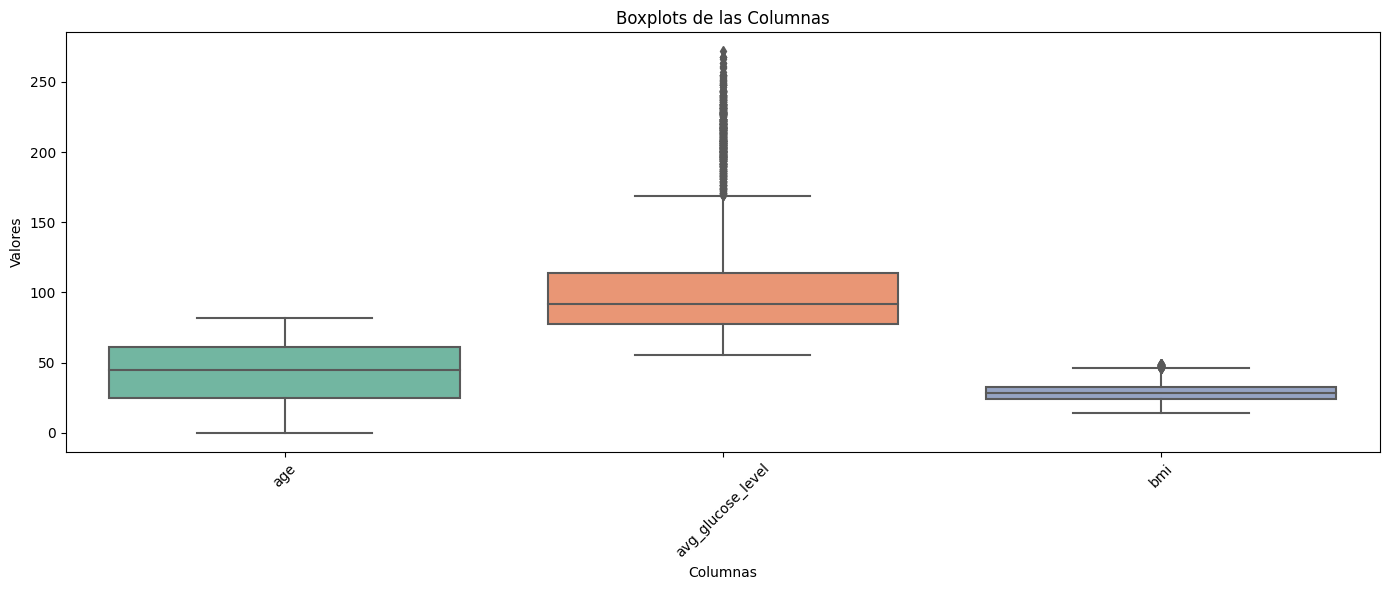

In [ ]:
columns_boxplot= df[['age', 'avg_glucose_level', 'bmi']]

# Configurar el tamaño de la figura
plt.figure(figsize=(14, 6))

# Crear boxplots para las 4 columnas
sns.boxplot(data=columns_boxplot, orient="v", palette="Set2")

# Configurar etiquetas de los ejes y título
plt.xticks(rotation=45)
plt.xlabel("Columnas")
plt.ylabel("Valores")
plt.title("Boxplots de las Columnas")

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Podemos observar que en los valores avg_glucose_level y bmi aparecen outliers que más adelante investigaremos.

In [ ]:
fig = px.scatter_3d(df, x='age', y='avg_glucose_level', z='bmi',
              color='stroke', color_continuous_scale='bluered', opacity=0.5)
fig.show()

**Observaciones**

La variable que más afecta a los casos de ictus es la edad. 

También podemos ver más casos de ictus en valores altos y bajos de glucosam, pero al mirar los puntos rojos de ambas con más detalle, vemos que coincide con personas de edad avanzad. Es decir, que los valores altos y bajos de glucosa se dan con más frecuencia en personas ancianas, y de ahí que haya más incidencia de ictus.

## **3. Feature Engineering**


**TO DO**

- Round 'age' and convert it to an integer.
- Reduce the 'smoking_status' column to two variables: true or false (1, 0).
- Crear rangos de edad
- Crear rangos de glucosa
- Crear rangos de BMI


## **4. Data Preprocessing**

4.1. Dropping Unused Columns

4.2. Null Values Imputation

4.3. Feature Encoding

4.4. Feature Balancing

4.5. Feature and Target Variable Selection

4.6. Train-Test Split

4.7. Feature Scaling

### **4.1. Dropping Unused Columns**

### **4.2. Null Values Imputation**

**TO DO**

- Replace the 'Unknown' values in 'smoking_status' for children under 12 years old with 'never smoker'.

### **4.3. Feature Encoding**

### **4.4. Feature Balancing**

### **4.5. Feature and Target Variable Selection**

### **4.6. Train-Test Split**

### **4.7. Feature Scaling**

## **5. Model Building**

## **6. Model Performance Check**

## **7. Model Hyper Parameter Tunning**

## **8. Analysis of the Most Influential Features in the Model**

## **9. Conclusion**

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=311bc360-0ff3-42ad-8fe8-990672a12326' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>